## LOADING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# LOADING DATA

In [2]:
print('directories of files')
file_dir = r'C:\Users\BOLAJI\Desktop\PROJECT'
train_name = 'train_ctrUa4k.csv'
test_name = 'test_lAUu6dG.csv'
sample_submission_name = 'sample_submission_49d68Cx.csv'

train_dir = os.path.join(file_dir, train_name)
test_dir = os.path.join(file_dir, test_name)
sample_submission_dir = os.path.join(file_dir, sample_submission_name)

directories of files


In [59]:
os.startfile(sample_submission_dir)

In [4]:
train = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)
sample_submission = pd.read_csv(sample_submission_dir)

## EXPLORATORY DATA ANALYSIS

In [5]:
train.columns = [i.lower() for i in train.columns]
test.columns = [i.lower() for i in test.columns]

In [24]:
train.head()

,Rural,Semiurban,Urban,married,dependents,education,self_employed,loanamount,loan_amount_term,credit_history,loan_status,total_imcome
0,0,0,1,0,0,1,0,NaN,360.0,1.0,Y,5849.0
1,1,0,0,1,1,1,0,128.0,360.0,1.0,N,6091.0
2,0,0,1,1,0,1,1,66.0,360.0,1.0,Y,3000.0
3,0,0,1,1,0,0,0,120.0,360.0,1.0,Y,4941.0
4,0,0,1,0,0,1,0,141.0,360.0,1.0,Y,6000.0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Rural               614 non-null uint8
Semiurban           614 non-null uint8
Urban               614 non-null uint8
married             614 non-null int64
dependents          614 non-null int64
education           614 non-null int64
self_employed       614 non-null int64
loanamount          592 non-null float64
loan_amount_term    600 non-null float64
credit_history      564 non-null float64
loan_status         614 non-null object
total_imcome        614 non-null float64
dtypes: float64(4), int64(4), object(1), uint8(3)
memory usage: 45.1+ KB


In [8]:
train.shape

(614, 13)

In [9]:
train.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
train.describe(include = np.object)

,loan_status
count,614
unique,2
top,Y
freq,422


Y    422
N    192
Name: loan_status, dtype: int64
percentage of values for yes:  69.0
percentage of values for no:  31.0


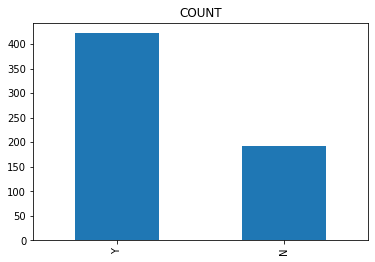

In [11]:
train['loan_status'].value_counts().plot(kind = 'bar', title = 'COUNT');
print(train['loan_status'].value_counts())
print('percentage of values for yes: ', np.round(train['loan_status'].value_counts()[0]/len(train)*100))
print('percentage of values for no: ', np.round(train['loan_status'].value_counts()[1]/len(train)*100))

## FEATURE ENGINEERING

In [12]:
train['total_imcome'] = train['applicantincome'] + train['coapplicantincome']
test['total_imcome'] = test['applicantincome'] + test['coapplicantincome']

In [13]:
train.drop(['loan_id', 'gender', 'applicantincome', 'coapplicantincome'], axis = 1, inplace = True)
test.drop(['loan_id', 'gender', 'applicantincome', 'coapplicantincome'], axis = 1, inplace = True)

In [14]:
train.columns

Index(['married', 'dependents', 'education', 'self_employed', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status',
       'total_imcome'],
      dtype='object')

In [15]:
def married(i):
    if i == 'No':
        return 0
    elif i == 'Yes':
        return 1
    else:
        return -9999
train['married'] = train['married'].apply(married)
test['married'] = test['married'].apply(married)

In [16]:
def dependents(i):
    if i == '0':
        return 0
    elif i == '1':
        return 1
    elif i == '2':
        return 2
    elif i == '3+':
        return 3
    else:
        return -9999
train['dependents'] = train['dependents'].apply(dependents)
test['dependents'] = test['dependents'].apply(dependents)

In [17]:
def self_employed(i):
    if i == 'No':
        return 0
    elif i == 'Yes':
        return 1
    else:
        return -9999
train['self_employed'] = train['self_employed'].apply(self_employed)
test['self_employed'] = test['self_employed'].apply(self_employed)

In [18]:
def education(i):
    if i == 'Graduate':
        return 1
    else:
        return 0
train['education'] = train['education'].apply(education)
test['education'] = test['education'].apply(education)

In [20]:
dumm = pd.get_dummies(train['property_area'])
M = pd.concat([dumm, train], axis = 1, sort = False)
M.drop('property_area', axis = 1, inplace = True)
train = M

KeyError: 'property_area'

In [23]:
dumm1 = pd.get_dummies(test['property_area'])
M1 = pd.concat([dumm1, test], axis = 1, sort = False)
M1.drop('property_area', axis = 1, inplace = True)
test = M1

In [25]:
def loan_status(i):
    if i == 'N':
        return 0
    else:
        return 1
train['loan_status'] = train['loan_status'].apply(loan_status)

In [26]:
train.fillna(-9999, inplace = True)
test.fillna(-9999, inplace = True)

In [27]:
X = train.drop('loan_status', axis = 1)
y = train['loan_status']

In [28]:
print(X['married'].unique())
print(X['dependents'].unique())
print(X['education'].unique())
print(X['self_employed'].unique())


[    0     1 -9999]
[    0     1     2     3 -9999]
[1 0]
[    0     1 -9999]


In [29]:
X.isna().sum()

Rural               0
Semiurban           0
Urban               0
married             0
dependents          0
education           0
self_employed       0
loanamount          0
loan_amount_term    0
credit_history      0
total_imcome        0
dtype: int64

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Rural               614 non-null uint8
Semiurban           614 non-null uint8
Urban               614 non-null uint8
married             614 non-null int64
dependents          614 non-null int64
education           614 non-null int64
self_employed       614 non-null int64
loanamount          614 non-null float64
loan_amount_term    614 non-null float64
credit_history      614 non-null float64
total_imcome        614 non-null float64
dtypes: float64(4), int64(4), uint8(3)
memory usage: 40.3 KB


In [31]:
y = np.array(y)

categorical_col = [i for i in X.columns if X[i].dtypes == np.object]
num_col = [i for i in X.columns if X[i].dtypes != np.object]

categorical_col, num_col

In [32]:
SSS = StratifiedShuffleSplit(test_size = 0.2)

for train_index, test_index in SSS.split(X.values, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [42]:
std = StandardScaler()
Rfc = RandomForestClassifier(n_estimators= 400, random_state= 50)

In [38]:
pipe  = Pipeline([('std', std), ('model', Rfc)])

In [35]:
kfold = KFold(n_splits=10, shuffle=True, random_state= 42)

In [43]:
score = cross_val_score(estimator=pipe, X = X.values, y = y, cv= kfold, scoring = 'accuracy')
print('mean of scores', np.mean(score))

mean of scores 0.7948175568482284


In [51]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.7723577235772358


In [52]:
y_pred_rfc = pipe.predict(test.values)

In [53]:
y_pred_rfc

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [54]:
def loan_status(i):
    if i == 0:
        return 'N'
    else:
        return 'Y'
test['loan_status'] =pd.Series(data = y_pred_rfc, name= 'loan_status').apply(loan_status)

In [58]:
sample_submission.tail()

,Loan_ID,Loan_Status
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
366,LP002989,Y


In [56]:
sample_submission['Loan_Status'] = test['loan_status']

In [60]:
sample_submission.describe()

,Loan_ID,Loan_Status
count,367,367
unique,367,2
top,LP002482,Y
freq,1,292


In [62]:
sample_submission.to_csv('sample_submission1.csv', index = False)